In [10]:

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
from dotenv import load_dotenv
import os
import openai

from bs4 import BeautifulSoup
import re
import time
import pickle
import numpy as np 
import pandas as pd

from scrapifurs import utils
from scrapifurs.GPTinstructions import GPTinstructions

from tqdm import trange, tqdm

# Info_dict to set up all used variables

In [11]:
# setup basic variable as dict 
info_dict = {'init_url':'https://www.linkedin.com/',
             'save_password_dir':'/Users/phil/Dropbox/GITHUB/DATA/scrapifurs/saved_cookies/',
             'start_url':'https://www.linkedin.com/search/results/people/?keywords=data%20scientist&origin=CLUSTER_EXPANSION&sid=fRq'}
info_dict['full_cookies_save_path'] = info_dict['save_password_dir']+os.sep+"linkedin_cookies.pkl"


# Scraping step

### INIT API key,  intrucitons for GPT which can be saved as text files in the correct data/instrucitons dir of the package

In [13]:

# setup API key for chatGPT 
load_dotenv()  # take environment variables from .env.
os.environ["OPENAI_API_KEY"]  = os.getenv("OPENAI_API_KEY")
openai.api_key = os.environ["OPENAI_API_KEY"]


# allow you to save instructions to append ot the beginning of a GPT command based on the txt files in 
# the data directory (or set a custom directory). modular for the many different commands and instructions 
# we may need. 
instructions = GPTinstructions()

# # Print all instructions keys
# instructions.print_instructions()

# get the instructions for this example
gpt_instructions = instructions.get_instruction("linkedinSearchExtractNamesDF")



### INIT API key,  intrucitons for GPT which can be saved as text files in the correct data/instrucitons dir of the package

In [13]:

# setup API key for chatGPT 
load_dotenv()  # take environment variables from .env.
os.environ["OPENAI_API_KEY"]  = os.getenv("OPENAI_API_KEY")
openai.api_key = os.environ["OPENAI_API_KEY"]


# allow you to save instructions to append ot the beginning of a GPT command based on the txt files in 
# the data directory (or set a custom directory). modular for the many different commands and instructions 
# we will need. 
instructions = GPTinstructions()

# # Print all instructions keys
# instructions.print_instructions()
gpt_instructions = instructions.get_instruction("linkedinSearchExtractNamesDF")



### INIT API key,  intrucitons for GPT which can be saved as text files in the correct data/instrucitons dir of the package

In [13]:

# setup API key for chatGPT 
load_dotenv()  # take environment variables from .env.
os.environ["OPENAI_API_KEY"]  = os.getenv("OPENAI_API_KEY")
openai.api_key = os.environ["OPENAI_API_KEY"]


# allow you to save instructions to append ot the beginning of a GPT command based on the txt files in 
# the data directory (or set a custom directory). modular for the many different commands and instructions 
# we will need. 
instructions = GPTinstructions()

# # Print all instructions keys
# instructions.print_instructions()
gpt_instructions = instructions.get_instruction("linkedinSearchExtractNamesDF")



### trim text based on key workds and search characteristics

In [12]:
text_finder = utils.StringSectionExtractor()
text_finder.add_start_rule('search result pages', False)
text_finder.add_end_rule('Page \d+ of \d+', True)
text_finder.add_end_rule("these results helpful", False)
text_finder.add_end_rule("messaging overlay", False)

### INIT: chrome browser, login, save cookies (future login)

In [ ]:


#init chrome 
chrome_options = Options()
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=chrome_options)

driver.get(info_dict['init_url'])
time.sleep(2)
driver.get(info_dict['init_url'])
time.sleep(2)


# Load cookies if they exist
try:
    cookies = pickle.load(open(info_dict['full_cookies_save_path'], "rb"))
    for cookie in cookies:
        driver.add_cookie(cookie)
    driver.refresh()
    assert(not not cookies)# if empty try a different method
except:
    print("No cookies found. Manual login required.")
    # If not logged in
    input('Please login and press Enter to continue...')
    pickle.dump(driver.get_cookies(), open(info_dict['full_cookies_save_path'], "wb")) # save cookies after login
    

input('''set zoom to 25% for winow to see all website data that it needs, press enter to continue''')


#### start from the begining URL to scrape

In [ ]:
driver.get(info_dict['start_url'])
all_text = []

#### scrape all the pages moving form one page to the next and save

In [ ]:
f_name = '/Users/phil/Dropbox/GITHUB/DATA/scrapifurs/linked_in_search_saves/extractedLinkedinSearchDataRawText.pkl'

n_times = np.random.uniform(12, 45, 60)# randomize the times a little bit to prevent robotic like behavior
for k in n_times:
    time.sleep(k)
    url_text = utils.get_lxml_text(driver, remove_empty_lines=True)
    text_data = text_finder.extract(url_text)
    all_text.append(text_data)
    utils.click_next_button(driver)
    

utils.save_obj(all_text, f_name)
# with open(f_name, 'wb') as f:
#     pickle.dump(all_text, f)

for k in all_text:
    print(len(k))

# Chat GPT step

### INIT API key,  intrucitons for GPT which can be saved as text files in the correct data/instrucitons dir of the package

In [13]:

# setup API key for chatGPT 
load_dotenv()  # take environment variables from .env.
os.environ["OPENAI_API_KEY"]  = os.getenv("OPENAI_API_KEY")
openai.api_key = os.environ["OPENAI_API_KEY"]


# allow you to save instructions to append ot the beginning of a GPT command based on the txt files in 
# the data directory (or set a custom directory). modular for the many different commands and instructions 
# we will need. 
instructions = GPTinstructions()

# # Print all instructions keys
# instructions.print_instructions()
gpt_instructions = instructions.get_instruction("linkedinSearchExtractNamesDF")



#### pull out data using CHAT GPT API

In [27]:
f_name = '/Users/phil/Dropbox/GITHUB/DATA/scrapifurs/linked_in_search_saves/extractedLinkedinSearchDataRawText.pkl'
all_text = utils.load_obj(f_name)


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jaccard_similarity(str1, str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    union_length = len(set1.union(set2))
    if union_length == 0:
        return np.nan
    return len(set1.intersection(set2)) / union_length

# Create similarity matrix
similarity_matrix = [[jaccard_similarity(doc1, doc2) for doc2 in all_text] for doc1 in all_text]




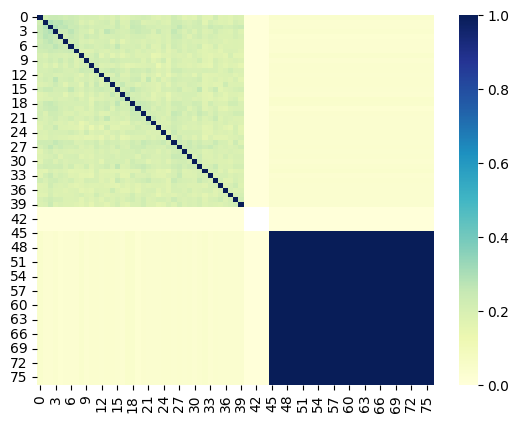

In [29]:
# Create a heatmap
sns.heatmap(similarity_matrix, annot=False, cmap="YlGnBu")
plt.show()

In [8]:
print(all_text[39][:200]+'\n\n___')# real data
print(all_text[40][:200]+'\n\n___')# empty
print(all_text[-1][:200]+'\n\n___')# no search results

.
About 621,000 results
          Status is offline
Jane Liang, PhDView Jane Liang,  PhD’s profile
• 2nd2nd degree connection
• 2nd2nd degree connection
Sr. Data Scientist at Intuit
Los Angeles Metrop

___


___
.
      No results found
  Try shortening or rephrasing your search.
          Edit search
                        About
                        Accessibility
                        Talent Solutions


___


In [24]:
columns = ["Name", "Job Titles", "Job Location", "Company Name"]
df = pd.DataFrame(columns=columns)

for kk, gpt_text in enumerate(tqdm(text_2_process)):
    messages = [ {"role": "system", "content": gpt_instructions} ]
    messages.append({"role": "user", "content": gpt_text})
    chat = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=messages)
    reply = chat.choices[0].message.content
    tmp1 = reply.split('##BEGIN##')[-1].split('##END##')[0]
    DF_TEMP = None
    exec(tmp1);
    DF_TEMP = pd.DataFrame(DF_TEMP)
    df= pd.concat([df, DF_TEMP], ignore_index=True)


df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [06:41<00:00, 10.30s/it]


,Name,Job Titles,Job Location,Company Name
0,Abhinav R.,Incoming Data Scientist at Chevron | USC Alum,"Los Angeles, CA",Chevron
1,Shijie (Selene) Xiang,Data Scientist at eBay,"Los Angeles, CA",eBay
2,Jinze Xin,Data Scientist at Twitter,Los Angeles Metropolitan Area,Twitter
3,"Syamil Mohd Razak, PhD",Data Scientist | Petroleum Engineer,Los Angeles Metropolitan Area,Phillips 66
4,Justin Chen,Data Scientist at Snap Inc.,Los Angeles Metropolitan Area,Snap Inc.
...,...,...,...,...
373,Sobhan N,Data Scientist,Los Angeles Metropolitan Area,Data Scientist II at Nordstrom
374,Shayne Yang,Data Scientist,"Los Angeles, CA",Data Scientist at BCG GAMMA
375,Mengxin Tan,Data Scientist,"Los Angeles, CA",Data Scientist at Rule14 LLC
376,Jacquelinne Mejia Sandoval,Data Analyst | Data Scientist,Los Angeles Metropolitan Area,None (No Company Mentioned)


In [30]:
f_name = '/Users/phil/Dropbox/GITHUB/DATA/scrapifurs/pandas_df/final_df_data_scientist_search_v1'


utils.save_obj(df, f_name+'.pkl', pickle.HIGHEST_PROTOCOL)




In [32]:
df.to_csv(f_name+'.csv', index=False)



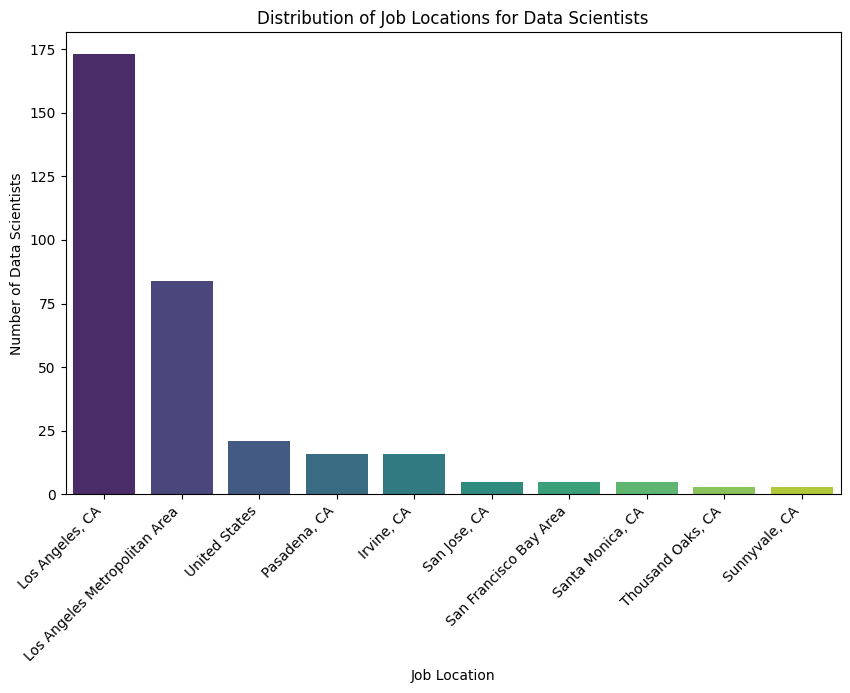

In [33]:
data_csv = df
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the distribution of job locations
job_location_counts = data_csv['Job Location'].value_counts().nlargest(10)

# Plotting the distribution of job locations
plt.figure(figsize=(10, 6))
sns.barplot(x=job_location_counts.index, y=job_location_counts.values, palette="viridis")
plt.title('Distribution of Job Locations for Data Scientists')
plt.xlabel('Job Location')
plt.ylabel('Number of Data Scientists')
plt.xticks(rotation=45, ha="right")
plt.show()


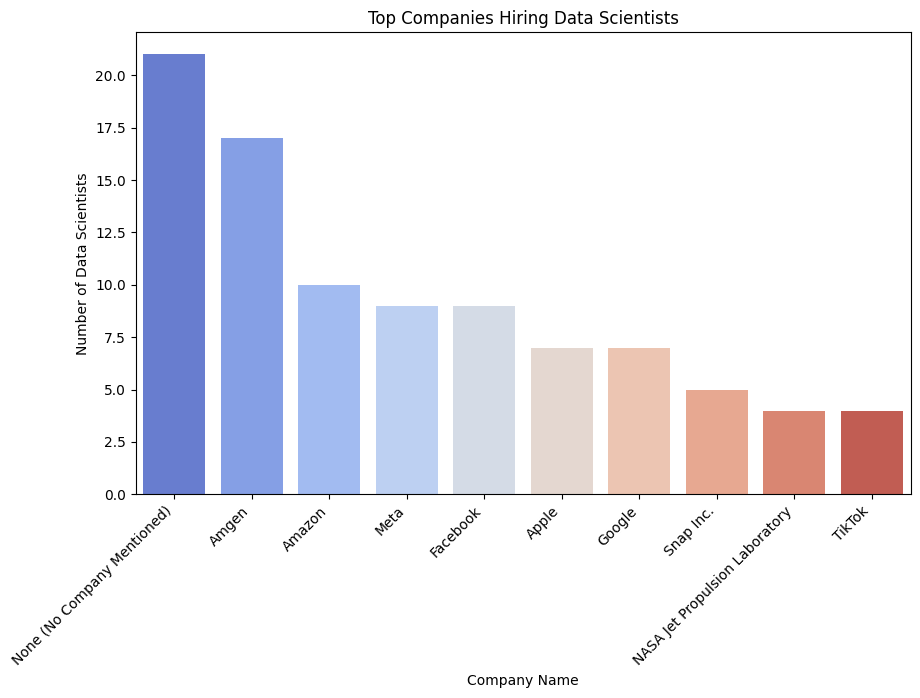

In [34]:
# Getting the top companies hiring data scientists
top_companies_counts = data_csv['Company Name'].value_counts().nlargest(10)

# Plotting the top companies hiring data scientists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies_counts.index, y=top_companies_counts.values, palette="coolwarm")
plt.title('Top Companies Hiring Data Scientists')
plt.xlabel('Company Name')
plt.ylabel('Number of Data Scientists')
plt.xticks(rotation=45, ha="right")
plt.show()


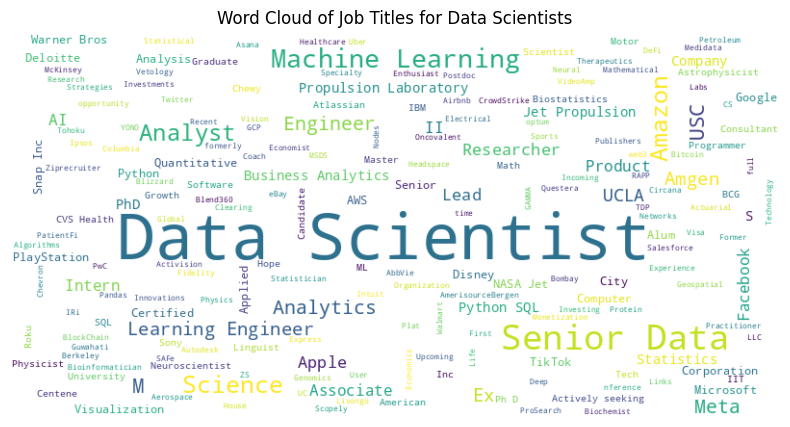

In [36]:
from wordcloud import WordCloud

# Concatenating all the job titles into a single string
job_titles_text = " ".join(title for title in data_csv['Job Titles'])

# Creating a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(job_titles_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Job Titles for Data Scientists')
plt.show()
